# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.2


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 20133739 #my ID:2013373
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [56 64 57 60 64 61 66 60 53 59]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [56 64 57 60 64 61 66 60 53 59]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


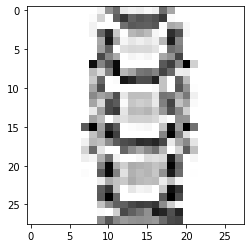

LABEL: 3
INPUT:


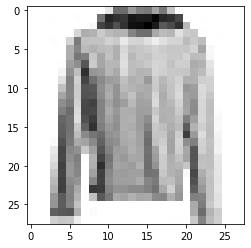

LABEL: 2
INPUT:


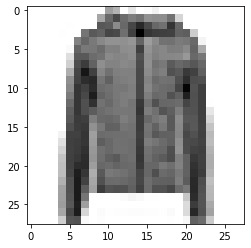

LABEL: 4


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(40,), (20,), (30,), (30,25,), (40,30,20) ]}

mlp = MLPClassifier(max_iter=270, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

#default activation: relu,momentum =0.9, it use the Nesterov's momentum

#My code:
NN_mlp=GridSearchCV(mlp,parameters,cv=5)
NN_mlp.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#My code:
print(NN_mlp.best_params_)

print("Score with best parameters:")
#My code:
print(NN_mlp.best_score_)

print("\nAll scores on the grid:")
#My code:

print(NN_mlp.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (40,)}
Score with best parameters:
0.7850000000000001

All scores on the grid:
[0.785      0.74833333 0.745      0.77166667 0.41166667]


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1,32,70,90, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

#My code:
mlp = MLPClassifier(max_iter=270, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,hidden_layer_sizes=(40,),
                    learning_rate_init=.1)
NN_mlp=GridSearchCV(mlp,parameters,cv=kf)
# recall to use cv=kf to use the k-fold subdivision seen in the lectures

#My code:
NN_mlp.fit(X_train,y_train)


print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#My code:
print(NN_mlp.best_params_)

print("Score with best parameters:")
#My code:
print(NN_mlp.best_score_)

print("\nAll scores on the grid:")
#My code:

print(NN_mlp.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'batch_size': 90}
Score with best parameters:
0.7849999999999999

All scores on the grid:
[0.10166667 0.74166667 0.775      0.785      0.77      ]


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

I see that the architecture which better perform the problem is the one that have one hidden layer with 40 neurons. This is reasonable since we have 10 classes and we are using a low number of samples, therefore complex architectures is not required.
Changing the batch size we observe that the SGD (batch size=1) is very bad. Increasing the size we get better result with a peak at batch size=90, after that score becomes smaller. The Mini-batch Gradient Descent turned out to be a good compromise between GD and SGD. 

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 0.51 sec

Training MLP of size (20,) ...
Done, training time: 0.88 sec

Training MLP of size (30,) ...
Done, training time: 1.14 sec

Training MLP of size (40,) ...
Done, training time: 1.16 sec

Training MLP of size (40, 25) ...
Done, training time: 0.56 sec

Training MLP of size (40, 30, 20) ...
Done, training time: 0.84 sec



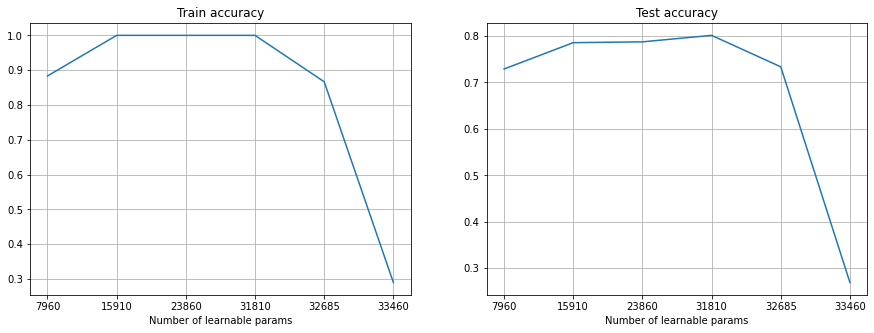

In [10]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,),(20,), (30,), (40,),(40,25,), (40,30,20)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    #My code:
    mlp =MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, hidden_layer_sizes=hl_size,batch_size=90,
                    learning_rate_init=.1)
    mlp.fit(X_train, y_train)
    #
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]


The test accuracy is equal to 1 for the architectures with one hidden layer of 30 and 40 neurons, the case with 40 neurons have also the best test accuracy.
A test accuracy so hight is usually due to overfitting,the reason is that we are using a small training set and the algorithm fit it completely.
Since we have a small number of training data, for more complex network the test accuracy decrease as I would expect. What I may not expect is that the training accuracy decrease with higher number of parameters, however deeper network need more data. 


### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

/home/daniele/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


train_accuracy for 0.001 is: 0.9683333333333334
validation_accuracy for  0.001 is : 0.783
train_accuracy for 0.01 is: 1.0
validation_accuracy for  0.01 is : 0.774
train_accuracy for 0.1 is: 1.0
validation_accuracy for  0.1 is : 0.778


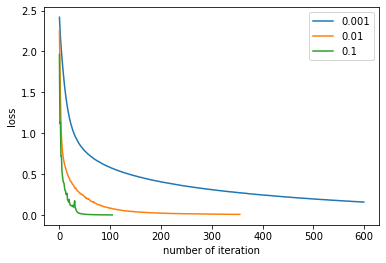

RESULTS FOR NN

Best parameters set found:
0.001
Score with best parameters:
0.783


In [11]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.001,0.01, 0.1]
#lr_list = [1*10**exp for exp in range(-3,0)]
scores = {}

#My code:
parameters={'learning_rate_init':lr_list}

#since my computer is not that fast, I don' use another GridSearchCV
#I use 1000 of the remaining data to get a validation set, and I use it to choose the best learning rate 
X_validation=X[m_training+m_test:m_training+m_test+1000]
y_validation=y[m_training+m_test:m_training+m_test+1000]
best=0
best_lr=100

for lr in lr_list:
    mlp = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        batch_size=90, hidden_layer_sizes=(40,), learning_rate_init=lr)
    mlp.fit(X_train, y_train)
    plt.plot(mlp.loss_curve_, label=str(lr))
    scoret=mlp.score(X_train,y_train)
    scorev=mlp.score(X_validation,y_validation)
    
    scores[lr]=scorev 
    print("train_accuracy for", lr , "is:" , scoret )
    print("validation_accuracy for ", lr, "is :", scorev )
    
    #take the best
    if scorev>best : 
        best_lr=lr
        best=scorev
    
plt.xlabel("number of iteration")
plt.ylabel("loss")
plt.legend()
plt.show()



print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#My code:
print(best_lr)
print("Score with best parameters:")
#My code:
print(best)



### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

The loss becomes smaller with the increase of the number of iteration. We  see that the algorithm for lr = 0.001 doesn' t converge yet(it needs more iteration).
In general we see that when the learning rate is bigger the convergence is fast but the optimization is very unstable. When it is smaller, instead, the optimization is stable but the convergence is very slow. 
For that reason I choose to use as best parameter lr = 0.01.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.212750


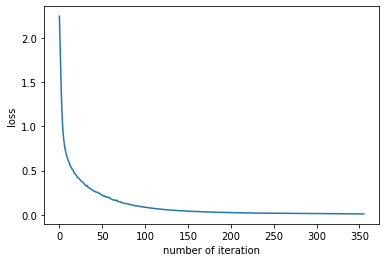

In [12]:
#get training and test error for the best NN model from CV
#I use learning rate= 0.01 since 0.1 is not stable when I increase the number of data and 0.001 is too slow.

#My code:
mlp_best = MLPClassifier(max_iter=400, alpha=1e-4, solver='sgd',
                         tol=1e-4, random_state=ID,
                         batch_size=90, hidden_layer_sizes=(40,), learning_rate_init=0.01)

mlp_best.fit(X_train, y_train)

training_error = 1. - mlp_best.score(X_train,y_train)
test_error = 1. - mlp_best.score(X_test,y_test)



print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

#MY CODE FOR PLOTTING
plt.plot(mlp_best.loss_curve_)
plt.xlabel('number of iteration')
plt.ylabel('loss')
plt.show()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [422 400 398 436 396 392 430 386 359 381]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.172964


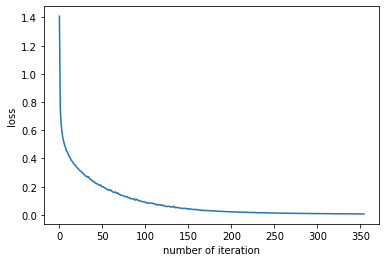

In [14]:
# use best architecture and params from before

#My code:

mlp_best_big = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd',
                         tol=1e-4, random_state=ID,
                         batch_size=90, hidden_layer_sizes=(40,), learning_rate_init=0.01
                         #    ,verbose=True
                        )

mlp_best_big.fit(X_train, y_train)

training_error = 1. - mlp_best_big.score(X_train,y_train)
test_error = 1. - mlp_best_big.score(X_test,y_test)



print ('\nRESULTS FOR BEST NN\n')

#get training and test error for the NN
print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

#MY CODE FOR PLOTTING
plt.plot(mlp_best_big.loss_curve_)
plt.xlabel('number of iteration')
plt.ylabel('loss')
plt.show()

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

With more data we still get training error equal to zero, however the test error decrease from $\sim 0.21$ to $\sim 0.17$. With other seeds we can see the decreasing of the training error too. 
The fact that the algorithm works better with more data is completely coherent with our expectation.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


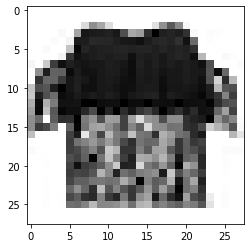

LABEL: 6
Index is: 4
600 data predict: 2
4000 data predict: 6


In [15]:
NN_prediction =mlp_best.predict(X_test) #MyCODE
large_NN_prediction =mlp_best_big.predict(X_test) #My CODE

#My code:
for i in range(len(y_test)):
    if NN_prediction[i]!=large_NN_prediction[i] and large_NN_prediction[i]==y_test[i]:
        plot_input(X_test,y_test,i)
        print("Index is:", i)
        print("600 data predict:", NN_prediction[i])
        print("4000 data predict:", large_NN_prediction[i])
        break

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


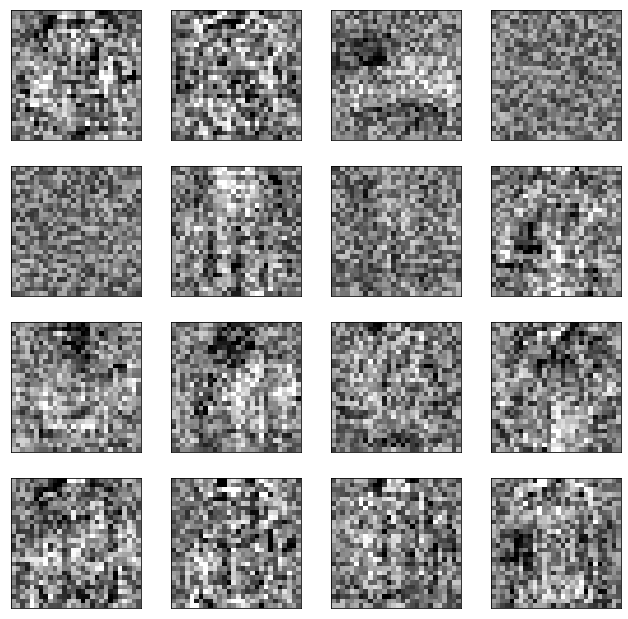

Weights with 4000 data points:


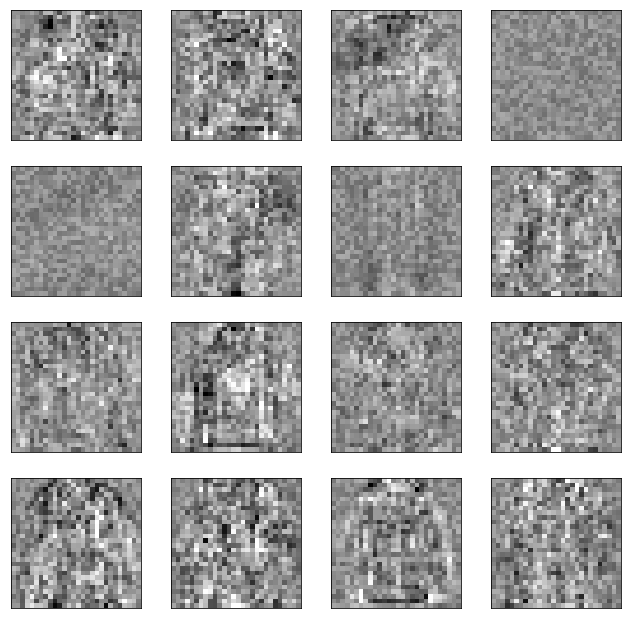

In [16]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4, figsize=(11,11))
vmin, vmax = mlp_best.coefs_[0].min(), mlp_best.coefs_[0].max()
for coef, ax in zip(mlp_best.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4, figsize=(11,11))
vmin, vmax = mlp_best_big.coefs_[0].min(), mlp_best_big.coefs_[0].max()
for coef, ax in zip(mlp_best_big.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]
I see that, with some fancy, some weights is similiar to the profile of a clothes. Other instead, is a bunch of noise, this neurons probably contribute less to the classification of the image. With 4000 samples I need less imagination to distinguish shapes in the images.


### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [17]:
m_training = 4000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

#My code
best_SVM = SVC(kernel='rbf', C=50, gamma=0.005)
best_SVM.fit(X_train, y_train)
#notice that in this notebook there' s a different seed

print ('RESULTS FOR SVM')

SVM_training_error =1. - best_SVM.score(X_train,y_train)  #My CODE

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1. - best_SVM.score(X_test,y_test) #My CODE
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0014999999999999458
Test score SVM:
0.15949999999999998


In [18]:
from sklearn import linear_model
from sklearn import metrics

regularization2 =linear_model.LogisticRegression(C=1, max_iter =1000 )
regularization2.fit(X_train,y_train) #My CODE

# you can re-use your code from Lab 2

#My  CODE
#prediction on the training
y_pred_train=regularization2.predict(X_train)
accuracy_train = metrics.accuracy_score(y_pred_train,y_train)

#prediction on the test
y_pred_test=regularization2.predict(X_test)
accuracy_test = metrics.accuracy_score(y_pred_test,y_test)
#errors:

training_error = 1 - accuracy_train #My CODE
test_error = 1 - accuracy_test #My CODE

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')


print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.038250
Test error (reg): 0.187000


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

|method|train_err|test_err|
|------|---------|--------|
|LR    |    0.038|0.187   |
|SVM   |    0.001|0.159   |
|NN    |    0    |0.173   |



SVM, as we can see in the table upon is way better than the others methods, as one could have expected. 
The worse method is the logistic regression.
Neural network places in the middle.